## KPIs
Se crea este notebook para poder entender correctamente los KPI's.

Definición:

Es una medida del nivel del rendimiento de un proceso.
Los indicadores son valores que miden el logro de objetivos generalmente en índices o porcentajes.
Los KPIs y los indicadores se diferencian en que los KPIs miden objetivos clave, no cualquier cosa.
Los KPIs requieren estar delimitados por un periodo de tiempo y un valor específico.

Para este proyecto los KPI's son los siguientes:

1 Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

2 Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año respecto al año anterior.

3 Reducir en un 5% la cantidad de siniestros viales de peatones respecto al año anterior.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### Primer KPI

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Para lograr esto se investigo la población total en CABA la cual es 3.120.612 habitantes (Censo 2022), segun datos oficiales tomados de [gobierno de Argentina/CABA](https://www.argentina.gob.ar/caba)

CREO UN DATAFRAME CON BASE EN EL ARCHIVO TRANSFORMADO DE HECHOS QUE YO LLAMÉ 'homicidios' PARA CREAR LA COLUMNA QUE ALOJARÁ LAS TASAS CORRESPONDIENTES

In [20]:
df_kpi1 = pd.read_csv('homicidios.csv')

In [21]:
df_kpi1 = df_kpi1.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()
df_kpi1["TASA"] = df_kpi1["N_VICTIMAS"]/3120612*100000
df_kpi1

,AAAA,Semestre,N_VICTIMAS,TASA
0,2016,1,65,2.082925
1,2016,2,79,2.531555
2,2017,1,69,2.211105
3,2017,2,71,2.275195
4,2018,1,70,2.243150
5,2018,2,79,2.531555
6,2019,1,57,1.826565
7,2019,2,47,1.506115
8,2020,1,31,0.993395
9,2020,2,50,1.602250


In [22]:
df_kpi1["Cambio_Porcentual"] = df_kpi1["TASA"].pct_change() * 100
df_kpi1

,AAAA,Semestre,N_VICTIMAS,TASA,Cambio_Porcentual
0,2016,1,65,2.082925,NaN
1,2016,2,79,2.531555,21.538462
2,2017,1,69,2.211105,-12.658228
3,2017,2,71,2.275195,2.898551
4,2018,1,70,2.243150,-1.408451
5,2018,2,79,2.531555,12.857143
6,2019,1,57,1.826565,-27.848101
7,2019,2,47,1.506115,-17.543860
8,2020,1,31,0.993395,-34.042553
9,2020,2,50,1.602250,61.290323


In [23]:
# Se combinan las columnas Año y Semestre en una sola columna Año_Semestre para facilitar los cálculos
df_kpi1['Año_Semestre'] = df_kpi1['AAAA'].astype(str) + '.' + df_kpi1['Semestre'].astype(str)
df_kpi1["Año_Semestre"] = df_kpi1["Año_Semestre"].astype(float)

In [24]:
# Para saber en que meses se cumplio el KPI se genera la siguiente tabla filtrada
df_kpi1[df_kpi1["Cambio_Porcentual"]<-10].reset_index()

,index,AAAA,Semestre,N_VICTIMAS,TASA,Cambio_Porcentual,Año_Semestre
0,2,2017,1,69,2.211105,-12.658228,2017.1
1,6,2019,1,57,1.826565,-27.848101,2019.1
2,7,2019,2,47,1.506115,-17.543860,2019.2
3,8,2020,1,31,0.993395,-34.042553,2020.1
4,11,2021,2,42,1.345890,-23.636364,2021.2


La tabla muestra los semestres que cumplen con el KPI

### Segundo KPI

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [43]:
df_merged = pd.read_csv('parapowerbi.csv')

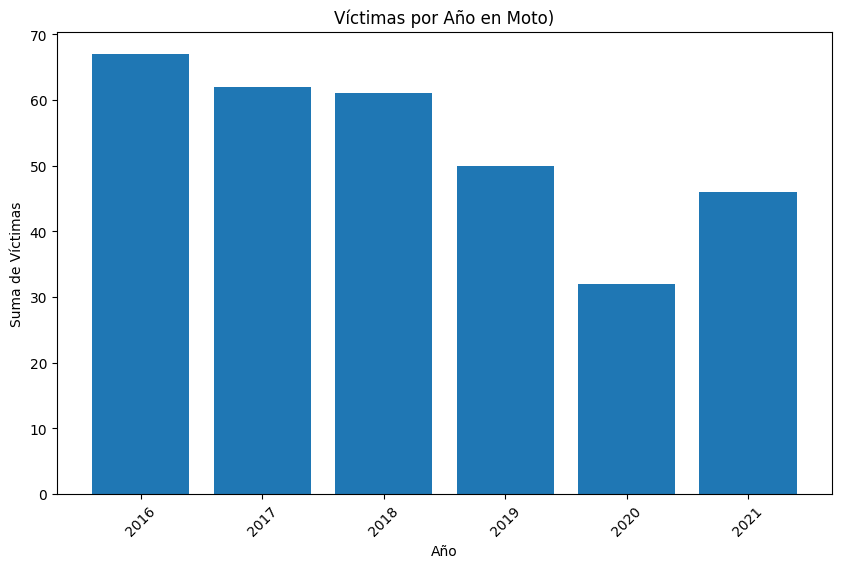

In [44]:
# Se realiza una grafica para observar el logro del segundo KPI, se incluye el conductor y el pasajero

condiciones = (df_merged['VICTIMA_y'] == 'MOTO')
df_filtrado = df_merged[condiciones]
resumen_anual = df_filtrado.groupby('AAAA_y')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(resumen_anual['AAAA_y'], resumen_anual['N_VICTIMAS'])
plt.title('Víctimas por Año en Moto)')
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Se calcula la columna de accidentes mortales de moto.
resumen_anual["TASA"] = ((resumen_anual['N_VICTIMAS'].shift(1) - resumen_anual['N_VICTIMAS']) / (resumen_anual['N_VICTIMAS'].shift(1)) * 100).fillna(0)
resumen_anual

,AAAA_y,N_VICTIMAS,TASA
0,2016,67,0.000000
1,2017,62,7.462687
2,2018,61,1.612903
3,2019,50,18.032787
4,2020,32,36.000000
5,2021,46,-43.750000


In [46]:
resumen_anual["Cambio_Porcentual"] = resumen_anual["TASA"].pct_change() * 100
resumen_anual

,AAAA_y,N_VICTIMAS,TASA,Cambio_Porcentual
0,2016,67,0.000000,NaN
1,2017,62,7.462687,inf
2,2018,61,1.612903,-78.387097
3,2019,50,18.032787,1018.032787
4,2020,32,36.000000,99.636364
5,2021,46,-43.750000,-221.527778


In [53]:
filtro = (resumen_anual['TASA'] > 0) & (resumen_anual['Cambio_Porcentual'] < -7)
resultados_filtrados = resumen_anual[filtro]
resultados_filtrados

,AAAA_y,N_VICTIMAS,TASA,Cambio_Porcentual
2,2018,61,1.612903,-78.387097


EN EL AÑO 2018 SE CUMPLE CON EL KPI NUMERO 2, SE LOGRA BAJAR LA TASA EN POR LO MENOS 7%

### Tercer KPI

Reducir en un 5% la cantidad de accidentes mortales de peatones en el último año, en CABA, respecto al año anterior.
Definimos a la cantidad de accidentes mortales de peatones en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucrados peatones en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales de peatones es: (Número de accidentes mortales de peatones en el año anterior - Número de accidentes mortales de peatones en el año actual) / (Número de accidentes mortales de peatones en el año anterior) * 100

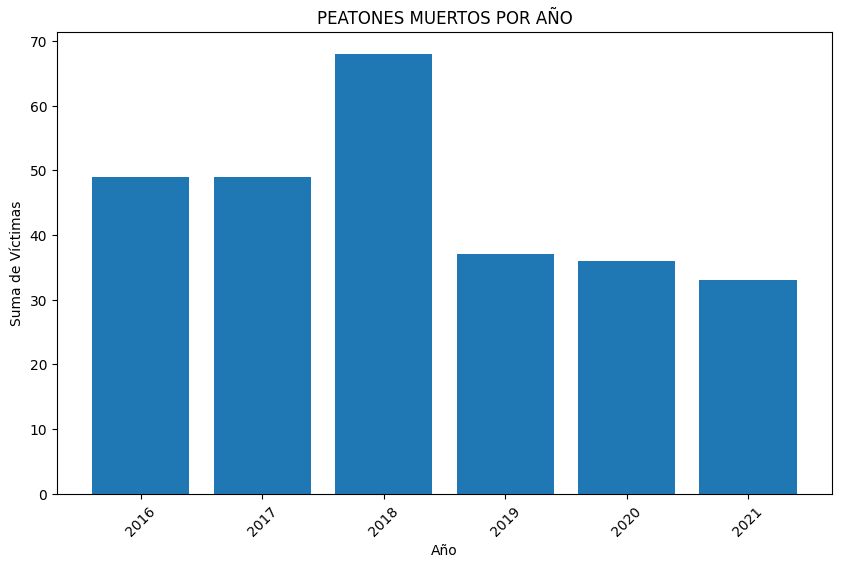

In [55]:
# Se realiza una grafica para observar el logro del tercer KPI

condiciones1 = (df_merged['ROL'] == 'PEATON') 
df_filtrado1 = df_merged[condiciones1]
resumen_anual1 = df_filtrado1.groupby('AAAA_y')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(resumen_anual1['AAAA_y'], resumen_anual1['N_VICTIMAS'])
plt.title('PEATONES MUERTOS POR AÑO')
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.xticks(rotation=45)
plt.show()

In [56]:
# Se calcula la columna de accidentes mortales de peatones.
resumen_anual1["TASA"] = ((resumen_anual1['N_VICTIMAS'].shift(1) - resumen_anual1['N_VICTIMAS']) / (resumen_anual1['N_VICTIMAS'].shift(1)) * 100).fillna(0)
resumen_anual1

,AAAA_y,N_VICTIMAS,TASA
0,2016,49,0.000000
1,2017,49,0.000000
2,2018,68,-38.775510
3,2019,37,45.588235
4,2020,36,2.702703
5,2021,33,8.333333


In [57]:
resumen_anual1["Cambio_Porcentual"] = resumen_anual1["TASA"].pct_change() * 100
resumen_anual1

,AAAA_y,N_VICTIMAS,TASA,Cambio_Porcentual
0,2016,49,0.000000,NaN
1,2017,49,0.000000,NaN
2,2018,68,-38.775510,-inf
3,2019,37,45.588235,-217.569659
4,2020,36,2.702703,-94.071491
5,2021,33,8.333333,208.333333


In [59]:
filtro1 = (resumen_anual1['TASA'] > 0) & (resumen_anual1['Cambio_Porcentual'] < -5)
resultados_filtrados1 = resumen_anual1[filtro1]
resultados_filtrados1

,AAAA_y,N_VICTIMAS,TASA,Cambio_Porcentual
3,2019,37,45.588235,-217.569659
4,2020,36,2.702703,-94.071491


EN LOS AÑOS 2019 Y 2020 SE CUMPLE CON EL KPI NUMERO 3, SE LOGRA BAJAR LA TASA EN POR LO MENOS 5%